In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
# Load the data
data = pd.read_excel('data/temperature25.xlsx')

In [3]:
# Sort the data based on the 'Current_A' column
sorted_data = data.sort_values(by='Current_A')
sorted_data10 = sorted_data[sorted_data['DeltaT_C'] == 10]

x_filtered = sorted_data10['Current_A']
y_filtered = sorted_data10['COP']

In [4]:
# Define a rational function
def rational_func_more_terms(x, a3, a2, a1, a0, b3, b2, b1, b0):
    return (a3*x**3 + a2*x**2 + a1*x + a0) / (b3*x**3 + b2*x**2 + b1*x + b0)

# Fit the data
params_rational_more_terms, _ = curve_fit(rational_func_more_terms, x_filtered, y_filtered, maxfev=5000)
print(params_rational_more_terms)

# Calculate fitted values and R^2
y_fit_rational_more_terms = rational_func_more_terms(x_filtered, *params_rational_more_terms)
r2_rational_more_terms = r2_score(y_filtered, y_fit_rational_more_terms)
print(r2_rational_more_terms)

[-7.25721220e+01  8.69257296e+02  1.49791947e+03 -4.87481507e+02
  1.45144249e+02  2.92159993e+02  6.11185820e+01  1.39050643e-07]
1.0


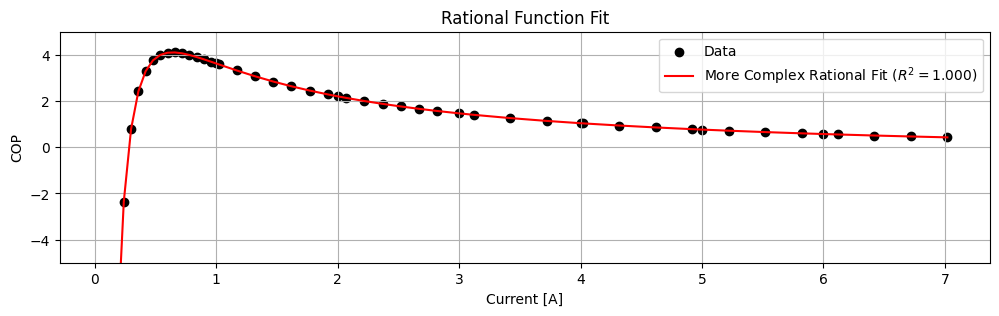

In [9]:
plt.figure(figsize=(12, 3))
plt.scatter(x_filtered, y_filtered, label='Data', color='black')
plt.plot(x_filtered, y_fit_rational_more_terms, label=f'More Complex Rational Fit ($R^2 = {r2_rational_more_terms:.3f}$)', color='red')

plt.xlabel('Current [A]')
plt.ylabel('COP')
plt.title('Rational Function Fit')
plt.ylim(-5, 5)
plt.legend()
plt.grid(True)
plt.show()

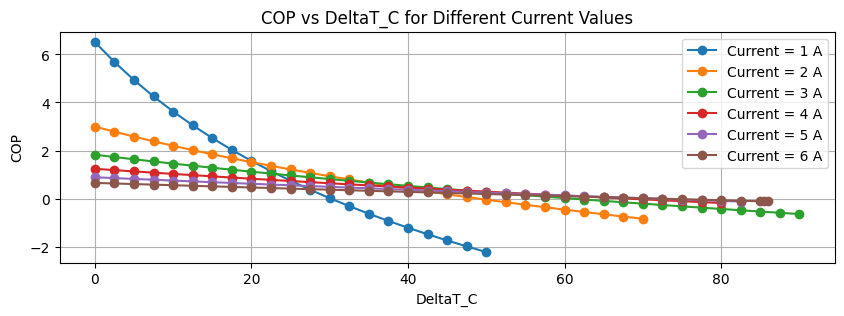

In [6]:
plt.figure(figsize=(10, 3))
for i in range(1, 7):
    current_data = data[data['Current_A'] == i]
    plt.plot(current_data['DeltaT_C'], current_data['COP'], label=f'Current = {i} A', marker='o')

plt.xlabel('DeltaT_C')
plt.ylabel('COP')
plt.title('COP vs DeltaT_C for Different Current Values')
plt.legend()
plt.grid(True)
plt.show()